<a href="https://colab.research.google.com/github/AutomatonDuck/python_programming/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy is 0.79


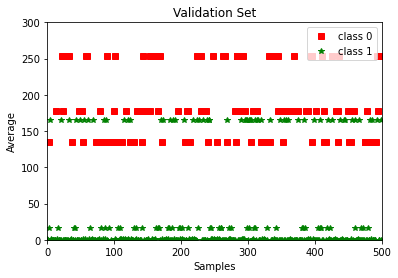

Accuracy is 0.53


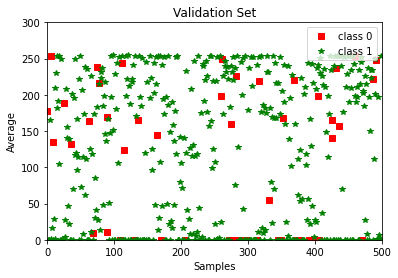

Accuracy is 0.92


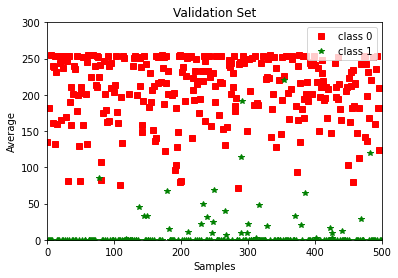

In [129]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import random
(x_train, y_train), (x_test, y_test) = mnist.load_data()





# Filters data so only 1s and 0s are in set
def filter(x,y):
  filtered = (y == 0) | (y == 1) #bitwise or
  x = x[filtered]
  y = y[filtered]
  y = y == 0 #0 is true
  return x, y


def model(c_x,c_y):
  ind = 0
  color = ['rs', 'g*']

  for x, y in zip(c_x, c_y):
    plt.plot(x,y, color[ind], label='class {}' .format(ind))
    ind = ind + 1
  plt.xlabel('Samples')
  plt.ylabel('Average')
  plt.legend(loc='upper right')
  plt.title("Validation Set")

  plt.axis([0, 500, 0, 300])
  plt.show()


def average(rows,col,label):
  sum = pixels = 0
  half = (rows/2) - 1
  for i in range(rows):
    if (i >= half - 1 and i <= half + 1):
      for col in range(col):
        if (col >= half and col <= half +1):
          pixels = pixels + 1
          sum = sum + label[i,col]
  return sum / pixels


def calc_acuraccy(x,y,samples, threshold):
  sample = 0
  c1_x = []
  c1_y = []
  c0_x = []
  c0_y = []

  c_x = [c1_x, c0_x]
  c_y = [c1_y, c0_y]

  correct = 0

  while sample < samples:
    avg = average(28,28, x[sample,:,:])
    
    if not y[sample]:
      c1_x.append(sample)
      c1_y.append(avg)
    elif y[sample]:
      c0_x.append(sample)
      c0_y.append(avg)
    if (avg > threshold and not y[sample]):
      correct = correct + 1
    elif (avg < threshold and y[sample]):
      correct = correct + 1
    sample = sample + 1
  print('Accuracy is {:.2f}'.format(correct / samples))
  model(c_x,c_y)




#print(x_train.shape, x_test.shape) #checking shape of data
#x_train_1 = x_train[y_train == 1, :, :] # load 1s form data
#x_train_0 = x_train[y_train == 0, :, :] # load 0s from data

x_train, ytrain = filter(x_train, y_train)
x_test, y_test = filter(x_test, y_test)

#print(x_train_1.shape, x_train_0.shape) # shape test
#plt.figure()
#plt.imshow(x_train[20],cmap = 'gray')
#plt.show() #plots dont show up during runtime without this
#plt.imshow(x_train[2],cmap = 'gray')
#plt.show()

################Data Splitting############################
num_train = x_train.shape[0]
x_sub = x_train[0:int(0.5*num_train),:,:]
y_sun = y_train[0:int(0.5*num_train)]

x_train = x_train[int(0.5*num_train):,:,:]
y_train = y_train[int(0.5*num_train):]
#print(x_sub.shape, x_train.shape)
#########################################################
np.random.seed()
index = np.random.choice(y_train, 500, replace=False) ## chooses 500 random indexes
val_x = x_train[index]
val_y = y_train[index]

calc_acuraccy(val_x, val_y, 500, 150)


#avg = np.mean(y_axis) # conversion to an attribute
#print(avg)
calc_acuraccy(x_train,y_train, 500,150)
calc_acuraccy(x_test,y_test,500, 150)
 

